In [1]:
from knowknow import *

In [2]:
db = Dataset("sociology-wos-74a")

loading variable sociology-wos-74a/groups from disk
loading variable sociology-wos-74a/group_reps from disk
loading variable sociology-wos-74a/_attributes from disk


In [6]:
db.groupings = []

In [3]:
groups = db.load_variable("groups")
group_reps = db.load_variable("group_reps")

loading variable sociology-wos-74a/groups from disk
loading variable sociology-wos-74a/group_reps from disk


In [5]:
def isarticle(x):
    sp = x.split("|")
    if len(sp) < 2:
        return False

    try:
        int(sp[1])
        return True
    except ValueError:
        return False

In [7]:
len(db.items('c'))

loading variable sociology-wos-74a/ind ___ c from disk


1705094

In [4]:
len(groups)

89337

In [10]:
c = Counter(groups.values())
c = Counter(c.values())

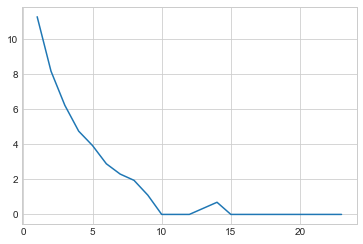

In [10]:
x = sorted(c.keys())
y = [np.log(c[xx]) for xx in x]
plt.plot(x,y)

In [19]:
udocs = list(group_reps.values())
n1 = len(groups)
n2 = sum(not isarticle(x) for x in groups)
n3 = sum(isarticle(x) for x in groups)
n4 = len(udocs)
n5 = sum(x for n,x in c.items() if n >= 5)

In [20]:
display(Markdown("""
There are {n1:,} cited works with at least 5 citations - {n2:,} books and {n3:,} articles.
After textual grouping, this reduces to {n4:,} distinct works.
There were {n5:,} cited works which had at least five separate pseudonyms.
""".format(**locals())))


There are 89,337 cited works with at least 5 citations - 39,407 books and 49,930 articles.
After textual grouping, this reduces to 83,858 distinct works.
There were 98 cited works which had at least five separate pseudonyms.


In [44]:
c = Counter(groups.values())

In [51]:
book_g = [g for x,g in groups.items() if not isarticle(x)]
article_g = [g for x,g in groups.items() if isarticle(x)]

In [52]:
book_g = [x for x in book_g if c[x]>1]
article_g = [x for x in article_g if c[x]>1]

In [53]:
# books

import json
toprint = 20
printed = 0
printi = 0

shuf = list(set(book_g))
shuffle(shuf)

while printed < toprint:
    
    myparts = ["%s (%s)" % (k,db(c=k).cits) for k,v in groups.items() if v==shuf[printi]]
    printi += 1
    
    pstr = "\n".join(myparts)
    
    if len(myparts) == 1:
        continue
        
    print(pstr)
    print()
    
    printed += 1

Morselli, E.|suicide essay comp m (9)
Morselli, H.|suicide essay comp m (18)

Kaplan, M.|leisure am (11)
Kaplan, M.|leisure theory polic (18)
Kaplan, M.|leisure am social in (28)

Hatcher, L.|step by step approac (35)
Hatcher, L.|step step approach u (9)

Wallace, W.|student culture (16)
Wallace, W.|student culture soci (8)

Schoenberg, R.|sociol methodol (18)
Schoenberg, R.|sociological methodo (8)

Tyler, A.|freedoms ferment (5)
Tyler, A.|freedoms ferment pha (7)

Levitas, R.|inclusive soc (7)
Levitas, R.|inclusive soc social (30)

Barker, D.|mothers babies dis l (6)
Barker, D.|mothers babies hlth (13)

Davis, M.|city quartz (20)
Davis, M.|city quartz excavati (41)

Selznick, P.|law soc ind justice (41)
Selznick, P.|law soc industrial j (11)

Huizinga, J.|homo ludens (43)
Huizinga, J.|homo ludens study pl (40)
Huizinga, J.|homoludens study pla (14)

Berry, J.|lobbying people (9)
Berry, J.|lobbying people poli (8)

Tylor, E.|primitive culture (37)
Tylor, E.|primitive culture re (9)

M

In [55]:
# article

import json
toprint = 30
printed = 0
printi = 0

shuf = list(set(article_g))
shuffle(shuf)

while printed < toprint:
    
    myparts = ["%s (%s)" % (k,db(c=k).cits) for k,v in groups.items() if v==shuf[printi]]
    printi += 1
           
    pstr = "\n".join(myparts)
    
    
    if len(myparts) == 1:
        continue
        
    print(pstr)
    print()
    
    printed += 1

Eisenhardt, K.|1989|acad manage rev,v14,p532 (43)
Eisenhardt, K.|1989|acad manage rev,v14,p57 (12)

Otto, L.|1977|sociol educ,v42,p102 (19)
Otto, L.|1977|sociol educ,v50,p102 (7)

Baker, P.|1981|teach sociol,v8,p123 (15)
Baker, P.|1981|teach sociol,v8,p325 (14)

Krause, N.|1989|j gerontol,v44,p4 (13)
Krause, N.|1989|j gerontol,v44,ps4 (12)

Pope, W.|1975|am sociol rev,v40,p111 (8)
Pope, W.|1975|am sociol rev,v40,p417 (13)

Halfacree, K.|1993|j rural stud,v9,p1 (6)
Halfacree, K.|1993|j rural stud,v9,p23 (13)

Bourdieu, P.|1987|hastings law j,v38,p805 (48)
Bourdieu, P.|1987|hastings law j,v38,p814 (8)

Fuchs, S.|1986|sociological theory,v4,p126 (5)
Fuchs, S.|1986|sociological theory,v4,p143 (13)

Heise, D.|1989|soc psychol quart,v52,p10 (9)
Heise, D.|1989|soc psychol quart,v52,p141 (10)

Attewell, P.|2001|sociol educ,v74,p252 (8)
Attewell, P.|2001|sociol educ,v74,p267 (10)

Lenski, G.|1956|am sociol rev,v21,p368 (6)
Lenski, G.|1956|am sociol rev,v21,p458 (58)
Lenski, G.|1956|am sociol re